In [100]:
#!pip install scikit_learn
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [101]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import SelfTrainingClassifier

In [102]:
#Import dataset
data = pd.read_csv('recipe_site_traffic_2212.csv')
#data = pd.read_csv('/content/recipe_site_traffic_2212 (3).csv')
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [103]:
data.tail()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High
946,947,184.56,45.21,6.20,0.03,Beverages,4,NaN


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [105]:
# Count the number of missing values
data.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [106]:
# Reconcile the semantically the same servings' values
data['servings'] = data['servings'].replace(['4 as a snack'], ['4'])
data['servings'] = data['servings'].replace(['6 as a snack'], ['6'])

<Axes: ylabel='Frequency'>

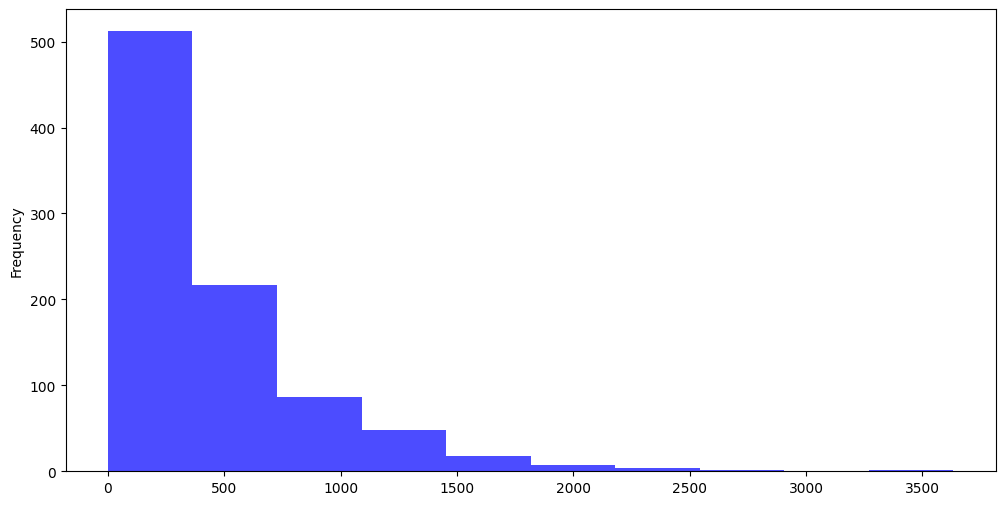

In [107]:
# Plot the histogram of the calories feature
plt.figure(figsize = (20, 15))

data['calories'].plot.hist(bins = 10, color = 'b', alpha = 0.7, figsize = (12, 6))


In [108]:

dummies = pd.get_dummies(data[['category', 'servings']])
dummies = dummies.astype(int)
dummies.head()

,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [109]:
data = pd.concat([data, dummies], axis=1)
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,category_Beverages,category_Breakfast,...,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,1,NaN,NaN,NaN,NaN,Pork,6,High,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2,35.48,38.56,0.66,0.92,Potato,4,High,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN,1,0,...,0,0,0,0,0,0,0,0,1,0


In [110]:
data.shape

(947, 23)

In [111]:
data.drop('servings', axis=1, inplace=True)
data.drop('category', axis=1, inplace=True)


In [112]:

#numerical_cols = data.select_dtypes(include='number').columns
desired_cols = ['calories', 'carbohydrate', 'sugar','protein']
numerical_cols = data.select_dtypes(include='number').columns
selected_numeric = [col for col in desired_cols if col in numerical_cols]


df_selected = data[selected_numeric]
# Initialize the KNNImputer (you can change n_neighbors as needed)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numerical data
#data_num_imputed = imputer.fit_transform(data_num)
data_num_imputed = imputer.fit_transform(df_selected)

# Convert the result back to a DataFrame
#data_imputed_df = pd.DataFrame(data_num_imputed, columns=numerical_cols, index=data.index)
data_imputed_df = pd.DataFrame(data_num_imputed, columns=desired_cols)
data_imputed_df

,calories,carbohydrate,sugar,protein
0,435.939196,35.069676,9.046547,24.149296
1,35.480000,38.560000,0.660000,0.920000
2,914.280000,42.680000,3.090000,2.880000
3,97.030000,30.560000,38.630000,0.020000
4,27.050000,1.850000,0.800000,0.530000
...,...,...,...,...
942,1161.000000,5.310000,22.390000,44.220000
943,435.939196,35.069676,9.046547,24.149296
944,951.740000,29.420000,3.570000,13.870000
945,266.610000,35.770000,0.970000,8.070000


In [113]:
for col in data_imputed_df:
    data[col] = data_imputed_df[col]

In [114]:
data

,recipe,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,...,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,1,435.939196,35.069676,9.046547,24.149296,High,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2,35.480000,38.560000,0.660000,0.920000,High,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,914.280000,42.680000,3.090000,2.880000,NaN,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,97.030000,30.560000,38.630000,0.020000,High,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,27.050000,1.850000,0.800000,0.530000,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,1161.000000,5.310000,22.390000,44.220000,NaN,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
943,944,435.939196,35.069676,9.046547,24.149296,High,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
944,945,951.740000,29.420000,3.570000,13.870000,High,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
945,946,266.610000,35.770000,0.970000,8.070000,High,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Split data

In [115]:
# Split data into labeled and unlabeled based on the modified 'high_traffic' column
data_labelled = data[data['high_traffic'].notna()].copy()
data_unlabelled = data[data['high_traffic'].isna()].copy()

# Convert 'High' to 1 and 'Low' to 0 in the labeled set
data_labelled['high_traffic'] = data_labelled['high_traffic'].map({'High': 1, 'Low': 0})

data_labelled_y = data_labelled['high_traffic']
data_labelled_X = data_labelled.drop('high_traffic', axis=1)

# Set the target for the unlabeled data to -1
data_unlabelled_y = pd.Series([-1] * len(data_unlabelled), index=data_unlabelled.index)
data_unlabelled_X = data_unlabelled.drop('high_traffic', axis=1)

In [116]:

# Split labeled data into training and test sets
labeled_data_X_train,labeled_data_X_test, labeled_data_y_train, labeled_data_y_test = train_test_split(data_labelled_X , data_labelled_y , test_size = 0.2, random_state =0)

In [117]:
labeled_data_X_train.shape ,labeled_data_X_test.shape, labeled_data_y_train.shape, labeled_data_y_test.shape

((459, 20), (115, 20), (459,), (115,))

###. Train a Model on Labeled Data

In [118]:

model = RandomForestClassifier()
model.fit(labeled_data_X_train, labeled_data_y_train)
model


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### . Generate Pseudo-Labels for Unlabeled Data

In [119]:

#Use the trained model to predict labels for the unlabeled data:
#y_unlabeled_pred = model.predict(data_unlabelled_X)
 


In [120]:
#3. Filter by Confidence. Only keep predictions with high confidence:

probs = model.predict_proba(data_unlabelled_X)
high_confidence_mask = np.max(probs, axis=1) > 0.95

X_unlabeled_confident = data_unlabelled_X[high_confidence_mask]
y_unlabeled_pred = model.predict(X_unlabeled_confident)
y_unlabeled_confident = y_unlabeled_pred[high_confidence_mask]

### 4. Combine Labeled and Pseudo-Labeled Data

In [121]:

#Now you can safely merge the confident pseudo-labeled data with your original labeled data:
X_train_updated = pd.concat([data_labelled_X, X_unlabeled_confident])
y_train_updated = pd.concat([data_labelled_y, pd.Series(y_unlabeled_confident)])


### 5. Retrain Your Model

In [122]:

#Train a new model on the combined dataset to improve generalization:
model_updated = RandomForestClassifier()
model_updated.fit(X_train_updated, y_train_updated)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [123]:
finalpred_y = model_updated.predict(labeled_data_X_test)

#### Apply outlier removal to unlabeled data

In [124]:
# Apply outlier removal to unlabeled data
def outlier(df, columns):
    # Create a boolean mask for rows to keep based on outliers in numerical columns
    mask = pd.Series(True, index=df.index)
    for col in columns:
        if col not in df.columns:
            continue
        Q_1 = df[col].quantile(0.25)
        Q_3 = df[col].quantile(0.75)
        IQR = Q_3 - Q_1
        lower_lim = Q_1 - 1.5 * IQR
        upper_lim = Q_3 + 1.5 * IQR
        mask = mask & (df[col] >= lower_lim) & (df[col] <= upper_lim)
    return df.loc[mask]

In [125]:
# Helper to get present numerical cols for a dataframe
def present_cols(df):
    return [c for c in numerical_cols if c in df.columns]


In [126]:

# Define numerical columns (excluding one-hot encoded)
numerical_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

# No outlier removal on labeled data to preserve class distribution
labeled_data_X_train_clean = labeled_data_X_train.copy()
labeled_data_y_train_clean = labeled_data_y_train.copy()

labeled_data_X_test_clean = labeled_data_X_test.copy()
labeled_data_y_test_clean = labeled_data_y_test.copy()


data_unlabelled_X_clean = outlier(data_unlabelled_X, numerical_cols)
data_unlabelled_y_clean = data_unlabelled_y.loc[data_unlabelled_X_clean.index]


#### Feature Scaling

In [127]:

# Feature scaling on numerical columns with safety checks
sc = StandardScaler()
sc_fitted = False

# Transform only non-empty dataframes and only for columns that exist
def safe_transform(df, df_name):
    cols = present_cols(df)
    if len(cols) == 0:
        print(f'No numeric columns to transform for {df_name}.')
        return df
    if df.shape[0] == 0:
        print(f'Skipping transform for {df_name}: dataframe is empty.')
        return df
    df.loc[:, cols] = sc.transform(df[cols])
    return df


# Try fitting the scaler on the most appropriate non-empty dataset (train -> test -> unlabeled)
fit_candidates = [
    (labeled_data_X_train_clean, 'labeled_data_X_train_clean'),
    (labeled_data_X_test_clean, 'labeled_data_X_test_clean'),
    (data_unlabelled_X_clean, 'data_unlabelled_X_clean'),
]
for df, name in fit_candidates:
    cols = present_cols(df)
    if len(cols) == 0:
        # no numeric columns present in this dataframe, skip
        continue
    if df.shape[0] > 0:
        try:
            sc.fit(df[cols])
            sc_fitted = True
            print(f'StandardScaler fitted on: {name} (rows={df.shape[0]}, cols={cols})')
            break
        except Exception as e:
            print(f'Failed to fit scaler on {name}: {e}')
if not sc_fitted:
    raise ValueError('No non-empty numeric dataset available to fit StandardScaler. Check your splits/outlier filtering.')


StandardScaler fitted on: labeled_data_X_train_clean (rows=459, cols=['calories', 'carbohydrate', 'sugar', 'protein'])


In [128]:

# Apply safe transforms
labeled_data_X_train_clean = safe_transform(labeled_data_X_train_clean, 'labeled_data_X_train_clean')
labeled_data_X_test_clean = safe_transform(labeled_data_X_test_clean, 'labeled_data_X_test_clean')
data_unlabelled_X_clean = safe_transform(data_unlabelled_X_clean, 'data_unlabelled_X_clean')
data_unlabelled_X.iloc[ :, :4] = sc.transform(data_unlabelled_X.iloc[ :, :4].values)

c:\Users\Lenovo\Documents\tasty_byte_new\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21776\2412949796.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.0044958  -1.00008021 -0.99566462 -0.99345682 -0.98904122 -0.98683343
 -0.98462563 -0.96696325 -0.96254766 -0.96033986 -0.95813206 -0.94046969
 -0.93826189 -0.9316385  -0.9294307  -0.9272229  -0.9250151  -0.91839171
 -0.91618392 -0.91397612 -0.91176832 -0.90735273 -0.90514493 -0.90293713
 -0.89852154 -0.89410594 -0.88306696 -0.87865136 -0.87423577 -0.86540458
 -0.86319678 -0.86098898 -0.85878119 -0.85657339 -0.85436559 -0.8521578
 -0.84995    -0.8477422  -0.83891101 -0.83670322 -0.82566423 -0.81683304
 -0.81020965 -0.80579405 -0.80358626 -0.79917066 -0.79033947 -0.78813168
 -0.78371608 -0.

####  Fit model

In [129]:


# Concatenate labeled and unlabeled data for self-training
X_combined = pd.concat([labeled_data_X_train_clean, data_unlabelled_X_clean], ignore_index=True)
y_combined = pd.concat([labeled_data_y_train_clean, data_unlabelled_y_clean], ignore_index=True)

clf_RF = SelfTrainingClassifier(RandomForestClassifier(random_state=42), threshold=0.95)
clf_RF.fit(X_combined, y_combined)

# Predict the unlabeled data using the trained model
unlabeled_data_imputed_y_pred = clf_RF.predict(data_unlabelled_X_clean)


#### Model prediction

In [130]:
# Add the predicted labels to the cleaned unlabeled data
data_unlabelled_X_clean_with_predictions = data_unlabelled_X_clean.copy()
data_unlabelled_X_clean_with_predictions['predicted_high_traffic'] = unlabeled_data_imputed_y_pred

# Load the original data again to retain the 'recipe' column
original_data = pd.read_csv('recipe_site_traffic_2212.csv')

# Merge the original data with the cleaned unlabeled data that includes predictions, using the index
recipes_with_predictions = original_data.merge(
    data_unlabelled_X_clean_with_predictions[['predicted_high_traffic']],
    left_index=True,
    right_index=True,
    how='inner'
)

# Filter for recipes predicted to have high traffic (where predicted_high_traffic is 1)
high_traffic_recipes = recipes_with_predictions[recipes_with_predictions['predicted_high_traffic'] == 1]

# Display the recipes predicted to have high traffic
print("Recipes predicted to have high traffic:")
display(high_traffic_recipes[['recipe', 'predicted_high_traffic']])

Recipes predicted to have high traffic:


,recipe,predicted_high_traffic
2,3,1
4,5,1
6,7,1
7,8,1
10,11,1
...,...,...
921,922,1
924,925,1
929,930,1
942,943,1


#### Evaluation 

In [131]:
#Training the data using LogisticRegression using X_train, y_train
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_LR = LogisticRegression()
clf_LR.fit(X_combined, y_combined)
y_pred_LR = clf_LR.predict(labeled_data_X_test_clean)
accuracy = accuracy_score(labeled_data_y_test_clean, y_pred_LR)
print(f"Accuracy: {accuracy}")

print(y_pred_LR)
from sklearn.metrics import classification_report
print(classification_report(labeled_data_y_test_clean, y_pred_LR))


Accuracy: 0.8695652173913043
[ 1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1 -1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.87      0.93       115

    accuracy                           0.87       115
   macro avg       0.50      0.43      0.47       115
weighted avg       1.00      0.87      0.93       115



c:\Users\Lenovo\Documents\tasty_byte_new\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\Documents\tasty_byte_new\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Lenovo\Documents\tasty_byte_new\.venv\Lib\s

In [132]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluate SelfTrainingClassifier on the labeled test set
y_pred_RF_test = clf_RF.predict(labeled_data_X_test_clean)
accuracy_RF_test = accuracy_score(labeled_data_y_test_clean, y_pred_RF_test)
print("SelfTrainingClassifier Performance on Test Set:")
print(f"Accuracy: {accuracy_RF_test}")
print(classification_report(labeled_data_y_test_clean, y_pred_RF_test))


SelfTrainingClassifier Performance on Test Set:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       115

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

